# Projeto de Taxa de Natalidade by:kedimo

In [2]:
#como de costume, iniciamos importando as bibliotecas que serão usadas durante nossa analise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando dataframe
df = pd.read_csv("births.csv")

In [4]:
#visualizando primeiras linhas
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [5]:
#Traduzindo variaveis para PT br para melhor entendimento dos dados
df.rename(columns={'year': 'Ano','month':'Mes', 'day':'Dia','gender':'Genero','births': 'Nasci'}, inplace = True)
df.head()

,Ano,Mes,Dia,Genero,Nasci
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
#substituindo valores nulos da variavel dia por zero, e alterando valores para tipo inteiro
df['Dia'].fillna(0, inplace=True)
df['Dia'] = df['Dia'].astype(int)

In [7]:
df.head()

,Ano,Mes,Dia,Genero,Nasci
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [8]:
#criando a varivel Decada com base na coluna Ano multiplicados por dez
df['Decada'] = 10 * (df['Ano'] //10)

In [9]:
df.pivot_table('Nasci', index='Decada', columns='Genero', aggfunc='sum')

Genero,F,M
Decada,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [10]:
df.head()

,Ano,Mes,Dia,Genero,Nasci,Decada
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


In [11]:
#selecionando somente os dados que nos interessa para a analise
nasc_por_decada = df.pivot_table('Nasci', index='Decada', columns='Genero', aggfunc='sum')

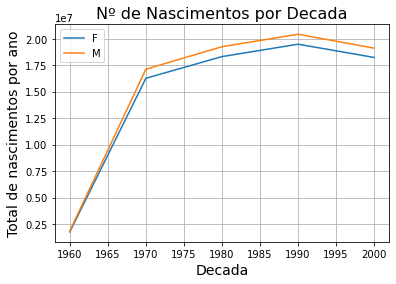

In [13]:
#gerando gráfico para visualização dos meus dados
nasc_por_decada.plot()
plt.title("Nº de Nascimentos por Decada", fontsize = 16)
plt.ylabel('Total de nascimentos por ano', fontsize = 14)
plt.xlabel('Decada', fontsize = 14)
plt.grid()
plt.legend()
plt.show()

#Podemos notar claramente que ao passar das Decadas o total de nascimentos por ano veio aumentando.
#Nota-se também que o número de nascimentos de pessoas do sexo Masculino foi relativamente maior
#em comparação aos do sexo Feminino

In [75]:
#vamos tratar e limpar um pouco nossos dados
#e assim podemos traçar nascimentos por dia da semana por várias décadas


quartis = np.percentile(df['Nasci'], [25,50,75])

In [15]:
media = quartis[1]

In [16]:
s = 0.74 * (quartis[2] - quartis[0])

In [17]:
nasci = df.query('(Nasci > @media - 5 * @s) and (Nasci < @media + 5 * @s)')

In [20]:
nasci.index = pd.to_datetime(10000 * nasci.Ano + 100 * nasci.Mes + nasci.Dia, format='%Y%m%d')

In [27]:
nasci['Dia_da_semana'] = nasci.index.dayofweek

/tmp/ipykernel_4525/128434498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nasci['Dia_da_semana'] = nasci.index.dayofweek


In [36]:
dia_nasci = nasci.pivot_table('Nasci', index='Dia_da_semana', columns = 'Decada', aggfunc='mean')

In [37]:
dia_nasci.index = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom']

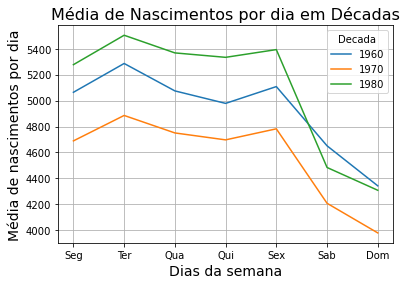

In [52]:
dia_nasci.plot()
plt.title("Média de Nascimentos por dia em Décadas", fontsize=16)
plt.ylabel("Média de nascimentos por dia", fontsize=14)
plt.xlabel('Dias da semana', fontsize=14)
plt.grid()
plt.show()

In [ ]:
#Aparentemente, os nascimentos são um pouco menos comuns nos fins de semana do que durante a semana! 
#Observe que as décadas de 1990 e 2000 estão ausentes 
#porque os dados do CDC contêm apenas o mês de nascimento a partir de 1989

In [100]:
dia = nasci['Mes'],nasci['Dia_da_semana']